In [4]:
from diagrams import Diagram, Cluster, Edge
from diagrams.programming.flowchart import Document, MultipleDocuments
from diagrams.onprem.vcs import Github
from diagrams.generic.compute import Rack

with Diagram("Company Detective", show=False, filename="../system_diagram"):
    pre_source = Rack("Airtable")

    source = Document("Company, product name, domain")

    pre_source >> source

    with Cluster("Reddit"):

        reddit_markdowns = source >> Edge(label="Google search") >> MultipleDocuments("URLs") >> Edge(label="PRAW") >> MultipleDocuments("Structured data\n(CommentForest)") >> MultipleDocuments("Markdown format")

    with Cluster("Glassdoor"):
        glassdoor_summary = source >> Edge(label="Google search") >> Document("URL") >> Edge(label="Scrapfly, when it works", style="dashed") >> MultipleDocuments("Structured data") >> MultipleDocuments("Markdown format") >> Edge(label="gpt4o-mini") >> Document("Key quotes")

    with Cluster("News"):
        news_summary = source >> Edge(label="Google search") >> MultipleDocuments("URLs") >> Edge(label="newspaper4k") >> MultipleDocuments("Structured data\n(Article text, Author, Date)") >> MultipleDocuments("Markdown format") >> Edge(label="gpt4o-mini") >> Document("Abstractive summary")

    with Cluster("Company webpage"):
        webpage_summary = source >> Edge(label="Google search") >> MultipleDocuments("URLs") >> Edge(label="newspaper4k") >> MultipleDocuments("Structured data\n(Article text, Author, Date)") >> MultipleDocuments("Markdown format") >> Edge(label="gpt4o-mini") >> Document("Abstractive summary")

    with Cluster("Crunchbase"):
        crunchbase_markdown = source >> Edge(label="Google search") >> Document("URL") >> Edge(label="Scrapfly") >> Document("Structured data") >> Document("Markdown format")

    with Cluster("Extra links"):
        links = source >> Edge(label="Google search") >> MultipleDocuments("Structured data\n(URLs, Titles, Snippets)")
        extra_links = links >> MultipleDocuments("Markdown format") >> Edge(label="gpt4o-mini") >> Document("Filtered, organized document")

        with Cluster("App Stores"):
            apple_reviews = links >> Edge(label="If present", style="dashed") >> MultipleDocuments("Apple app store reviews") >> MultipleDocuments("Markdown format")
            google_reviews = links >> Edge(label="If present", style="dashed") >> MultipleDocuments("Google play store reviews") >> MultipleDocuments("Markdown format")
            steam_reviews = links >> Edge(label="If present", style="dashed") >> MultipleDocuments("Steam reviews") >> MultipleDocuments("Markdown format")

    with Cluster("Customer Experience map-reduce"):
        cx_start = MultipleDocuments("Combined reviews")
        cx_summary = cx_start >> Edge(label="Extract quotes, gpt4o-mini") >> MultipleDocuments("Quotes by document") >> Edge(label="Organize, gpt4o-mini") >> Document("Quotes by topic")

    reddit_markdowns >> cx_start
    apple_reviews >> cx_start
    google_reviews >> cx_start
    steam_reviews >> cx_start

    general_summary = Document("General Summary")
    webpage_summary >> general_summary
    news_summary >> general_summary
    crunchbase_markdown >> general_summary

    unformatted_output = Document("Combined (Json)")
    general_summary >> unformatted_output
    extra_links >> unformatted_output
    cx_summary >> unformatted_output
    glassdoor_summary >> unformatted_output

    unformatted_output >> Document("HTML") >> Github("Public pages")
    # unformatted_output >> Document("Markdown")
    


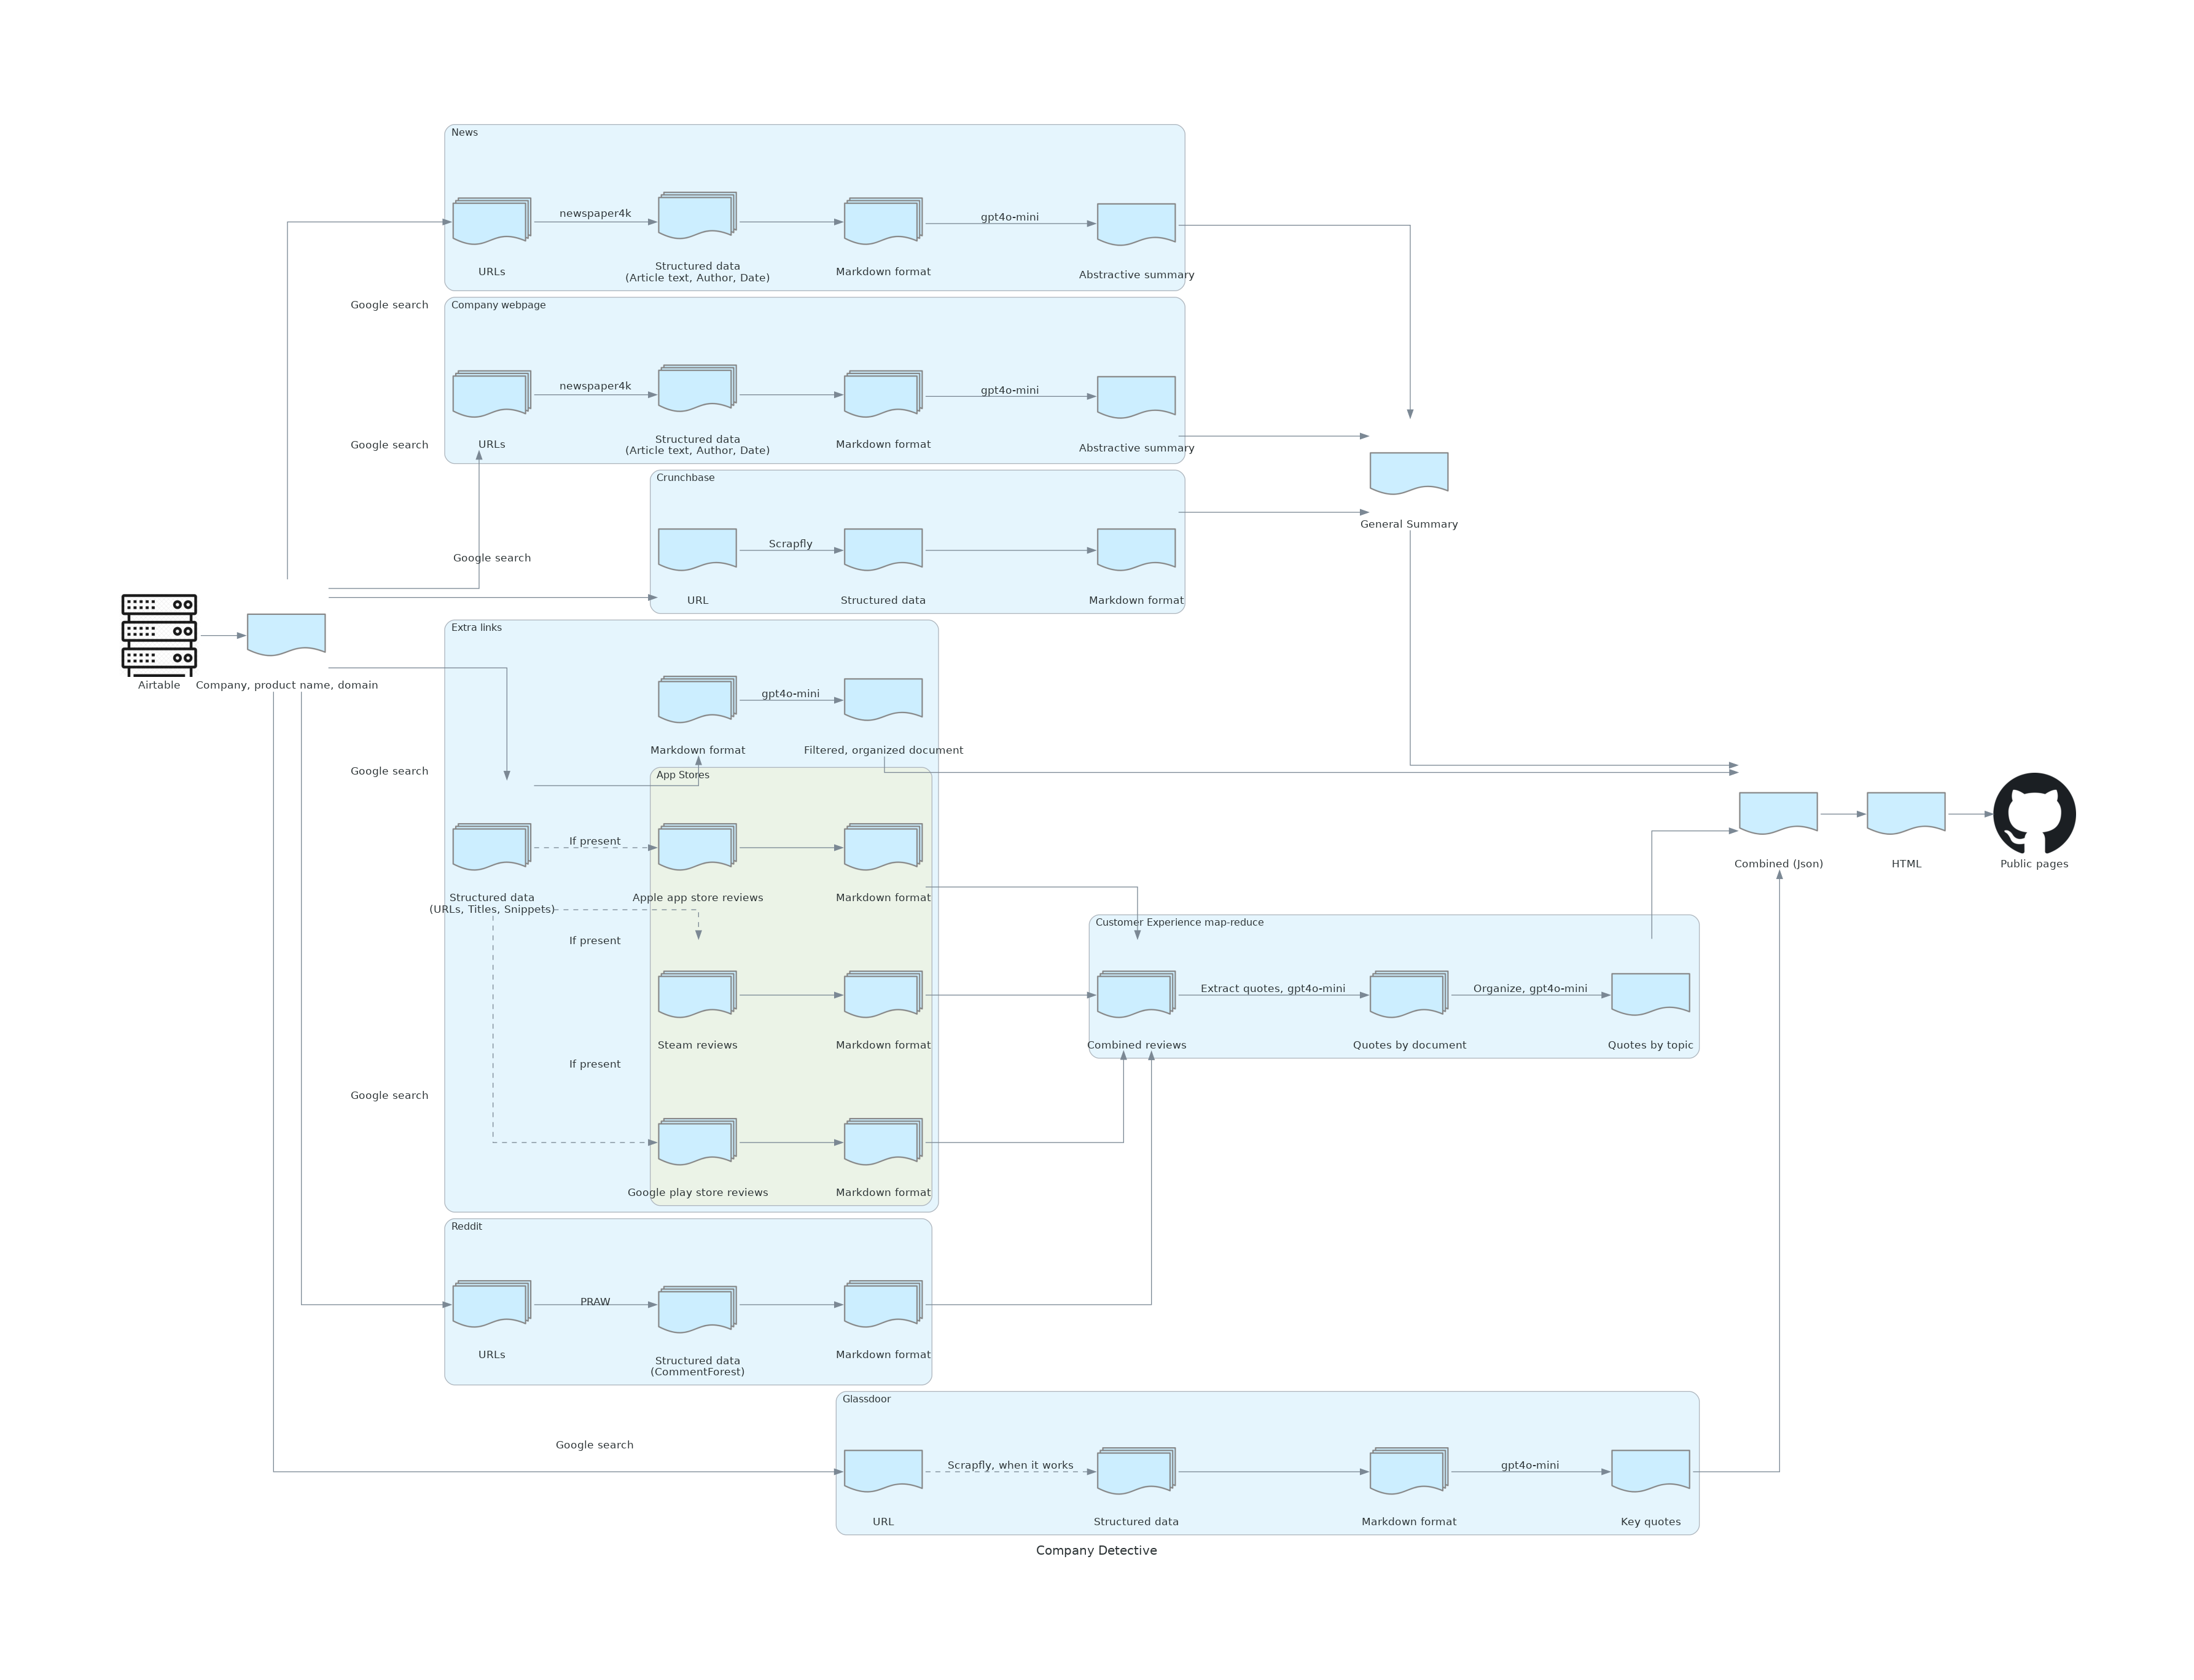

In [5]:
from IPython.display import Image
Image(filename="../system_diagram.png")